<a href="https://colab.research.google.com/github/Ajith6g7/Artificial-intelligence-task2-chatbot/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns



In [61]:
# Load the dataset (replace 'churn_data.csv' with your actual dataset file)
try:
    df = pd.read_csv('churn_data.csv')
except FileNotFoundError:
    print("Error: 'churn_data.csv' not found. Please make sure the dataset is in the correct directory.")
    # Create a dummy dataset for demonstration if the file is not found
    data = {
        'CustomerID': range(1, 1001),
        'Gender': np.random.choice(['Male', 'Female'], 1000),
        'SeniorCitizen': np.random.randint(0, 2, 1000),
        'Partner': np.random.choice(['Yes', 'No'], 1000),
        'Dependents': np.random.choice(['Yes', 'No'], 1000),
        'tenure': np.random.randint(1, 73, 1000),
        'PhoneService': np.random.choice(['Yes', 'No'], 1000),
        'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], 1000),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], 1000),
        'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
        'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
        'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
        'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
        'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
        'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 1000),
        'PaperlessBilling': np.random.choice(['Yes', 'No'], 1000),
        'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], 1000),
        'MonthlyCharges': np.random.uniform(18.0, 118.0, 1000),
        'TotalCharges': np.random.uniform(20.0, 8000.0, 1000),
        'Churn': np.random.choice(['Yes', 'No'], 1000)
    }
    df = pd.DataFrame(data)




Error: 'churn_data.csv' not found. Please make sure the dataset is in the correct directory.


In [62]:
# Drop CustomerID column as it's not needed for prediction
df = df.drop('CustomerID', axis=1)
# Convert 'TotalCharges' to numeric, coercing errors to NaN, then fill NaN with mean or median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)







/tmp/ipython-input-2430750963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [63]:
# Separate target variable
X = df.drop('Churn', axis=1)
y = df['Churn']
# Convert target variable to numerical (0 for No, 1 for Yes)
y = y.apply(lambda x: 1 if x == 'Yes' else 0)



In [64]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

In [65]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [66]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features), ('cat', categorical_transformer, categorical_features) ])

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Create the ANN model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
# Make predictions
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4230 - loss: 0.7099  


Test Loss: 0.6979
Test Accuracy: 0.4850
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [72]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [73]:
print("\nConfusion Matrix:")
print(conf_matrix)
print(f'\nAccuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Confusion Matrix:
[[55 30]
 [73 42]]

Accuracy: 0.4850
Precision: 0.5833
Recall: 0.3652
F1 Score: 0.4492


In [74]:
# Train the model
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5113 - loss: 0.7032 - val_accuracy: 0.4625 - val_loss: 0.7063
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5541 - loss: 0.6927 - val_accuracy: 0.4875 - val_loss: 0.7040
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5490 - loss: 0.6964 - val_accuracy: 0.5125 - val_loss: 0.7036
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5371 - loss: 0.6962 - val_accuracy: 0.5375 - val_loss: 0.7009
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5321 - loss: 0.6878 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5659 - loss: 0.6851 - val_accuracy: 0.5375 - val_loss: 0.7005
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5890 - loss: 0.6741 - val_accuracy: 0.5375 - val_loss: 0.7012
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6436 - loss: 0.6469 - val_accuracy: 0.5375 - val_loss:

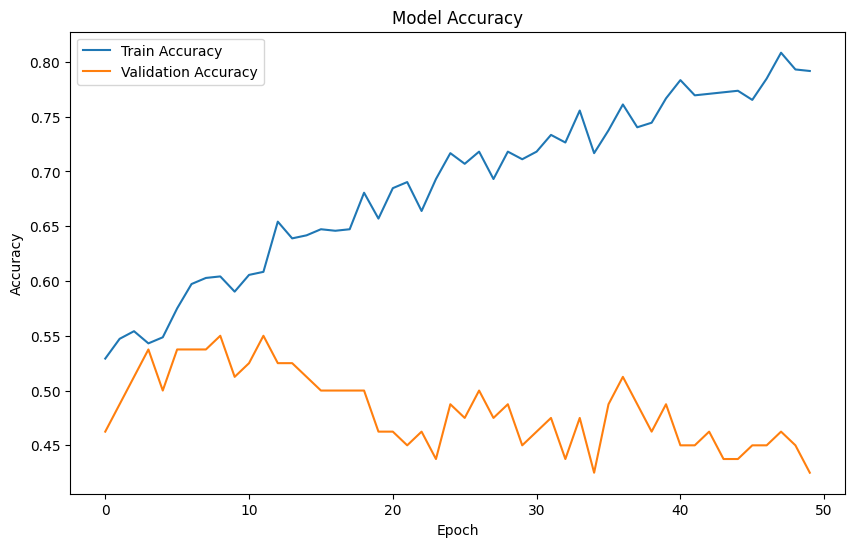

In [75]:
# Plot training history (optional)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()